In [1]:
### need to have all of these installed

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import statistics as stat
from collections import deque
from tensorflow import keras 

In [2]:
### TODO: Determine what data is needed for our model

"""
if you need a certain value from the DataFrame use this notation
    print(dataset_train.iloc[1].get("Unix Timestamp"))
"""

"""
To convert from these unix time stamps you need to convert to float then divide by 1000
    timestampEx = dataset_train.iloc[0].get("Unix Timestamp")
    timestampEx = np.float64(timestampEx).item() / 1000
    print(datetime.utcfromtimestamp(timestampEx).strftime("%D %H:%M"))
"""
dataset_train = pd.read_csv("data/ETH_1H_MAR7_APR7.csv")

time_set = dataset_train.iloc[:, 0].values
open_set = dataset_train.iloc[:, 3].values
close_set = dataset_train.iloc[:, 6].values
high_set = dataset_train.iloc[:, 4].values
low_set = dataset_train.iloc[:, 5].values
volumn_set = dataset_train.iloc[:, 7].values

openZeroCount,closeZeroCount, highZeroCount, lowZeroCount, volumnZeroCount = 0, 0, 0, 0, 0

### this means we aren't missing any records
print(len(open_set) == len(close_set) == len(high_set) == len(low_set) == len(volumn_set))

for i in range(len(open_set)):
    if(open_set[i] == 0):
        openZeroCount += 1 

    if(close_set[i] == 0):
        closeZeroCount += 1

    if(high_set[i] == 0):
        highZeroCount += 1

    if(low_set[i] == 0):
        lowZeroCount += 1
    
    if(volumn_set[i] == 0):
        volumnZeroCount += 1

stDevLow = stat.stdev(low_set)
stDevHigh = stat.stdev(high_set)
stDevOpen = stat.stdev(open_set)
stDevClose = stat.stdev(close_set)
stDevVolumn = stat.stdev(volumn_set)
print(f"stdev for low: {stDevLow}")
print(f"stdev for high: {stDevHigh}")
print(f"stdev for open: {stDevOpen}")
print(f"stdev for close: {stDevClose}")
print(f"stdev for volumn: {stDevVolumn}")

### taking this into account I don't think we can use volumn 
### we should replace these with the median value
### upon inspection, the record that contains the 0 values is the last one
### maybe we should just toss it out
print(f"number of open entries that are 0: {openZeroCount}")
print(f"number of close entries that are 0: {closeZeroCount}")
print(f"number of high entries that are 0: {highZeroCount}")
print(f"number of low entries that are 0: {lowZeroCount}")
print(f"number of volumn entries that are 0: {volumnZeroCount}")



True
stdev for low: 234.53257266811556
stdev for high: 239.46852661620176
stdev for open: 237.2054551051874
stdev for close: 237.2025640950822
stdev for volumn: 7003.560099198604
number of open entries that are 0: 0
number of close entries that are 0: 0
number of high entries that are 0: 0
number of low entries that are 0: 0
number of volumn entries that are 0: 2442


34496


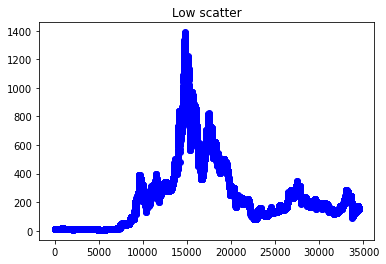

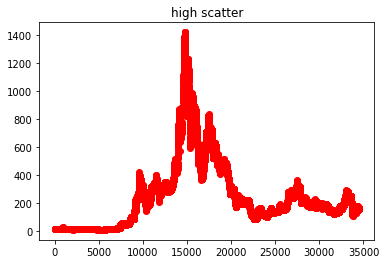

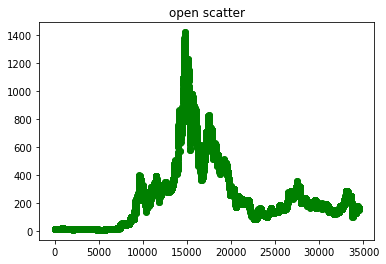

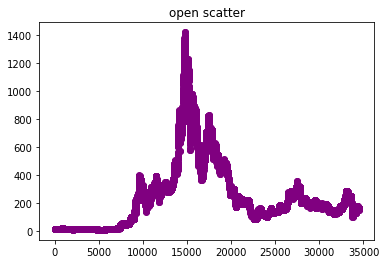

In [3]:
### ploting the data to determine if there is much noise
### This data appears almost noiseless
list = low_set.tolist()
list.reverse()
plt.title("Low scatter")
print(len(list))
plt.scatter(range(34496), list, color="blue")
plt.show()

list = high_set.tolist()
list.reverse()
plt.title("high scatter")
plt.scatter(range(34496), list, color="red")
plt.show()

list = open_set.tolist()
list.reverse()
plt.title("open scatter")
plt.scatter(range(34496), list, color="green")
plt.show()

list = close_set.tolist()
list.reverse()
plt.title("open scatter")
plt.scatter(range(34496), list, color="purple")
plt.show()

In [4]:
###Input Calculation( training data)

high_minus_low =[]
close_minus_open=[]
seven_day_MA =[]
fourteen_day_MA =[]
twentyone_day_MA =[]
seven_day_std = []


for i in range(34496):
    point = i+1
    high_minus_low.append(high_set[i] - low_set[i])
    close_minus_open.append(abs(close_set[i] - open_set[i]))
    if(i > 6):  
        seven_day_MA.append((sum(close_set[i-6:point]))/7)
        seven_day_std.append(stat.stdev(close_set[i-6:point]))
    else:
        seven_day_MA.append((sum(close_set[0:point])/point))
        if(i != 0):
            seven_day_std.append(stat.stdev(close_set[0:point]))
        else:
            seven_day_std.append(0)
    if(i > 13):
        fourteen_day_MA.append((sum(close_set[i-13:point])/14))
    else:
        fourteen_day_MA.append((sum(close_set[0:point])/point))
    if(i > 20):
        twentyone_day_MA.append((sum(close_set[i-20:point]))/21)
    else:
        twentyone_day_MA.append((sum(close_set[0:point])/point))

file = open("data/feature_value.csv" ,"w")
file.write("High minus low,close minus high,seven day moving average,fourteen day moving average,twentyone day moving average,seven day standard deviation\n")
for i in range(34496):
    file.write(str(high_minus_low[i]) + "," + str(close_minus_open[i]) + "," + str(seven_day_MA[i]) + "," + str(fourteen_day_MA[i]) + "," + str(twentyone_day_MA[i]) + "," + str(seven_day_std[i]) +"\n")

file.close()



In [5]:
### calculation for testing data
high_minus_low =[]
close_minus_open=[]
seven_day_MA =[]
fourteen_day_MA =[]
twentyone_day_MA =[]
seven_day_std = []

for i in range(32064,34496):
    point = i+1
    high_minus_low.append(high_set[i] - low_set[i])
    close_minus_open.append(abs(close_set[i] - open_set[i]))
    if(i > 6):  
        seven_day_MA.append((sum(close_set[i-6:point]))/7)
        seven_day_std.append(stat.stdev(close_set[i-6:point]))
    else:
        seven_day_MA.append((sum(close_set[0:point])/point))
        if(i != 0):
            seven_day_std.append(stat.stdev(close_set[0:point]))
        else:
            seven_day_std.append(0)
    if(i > 13):
        fourteen_day_MA.append((sum(close_set[i-13:point])/14))
    else:
        fourteen_day_MA.append((sum(close_set[0:point])/point))
    if(i > 20):
        twentyone_day_MA.append((sum(close_set[i-20:point]))/21)
    else:
        twentyone_day_MA.append((sum(close_set[0:point])/point))

file = open("data/testing_value.csv" ,"w")
file.write("High minus low,close minus high,seven day moving average,fourteen day moving average,twentyone day moving average,seven day standard deviation\n")
for i in range(len(high_minus_low)):
    file.write(str(high_minus_low[i]) + "," + str(close_minus_open[i]) + "," + str(seven_day_MA[i]) + "," + str(fourteen_day_MA[i]) + "," + str(twentyone_day_MA[i]) + "," + str(seven_day_std[i]) +"\n")

file.close()

In [6]:


###Batch creation

###training data
dataset_train = pd.read_csv("data/feature_value.csv")
training_set = dataset_train.iloc[:, 0:6]

sc = MinMaxScaler(feature_range = (0,1))
train_set_scaled = sc.fit_transform(training_set)

batch_train = []
for i in range(34496):
    for j in range(6):
        batch_train.append(train_set_scaled[i,j])

batch_train = np.array(batch_train)
batch_train = np.reshape(batch_train, newshape = (1078,32,6))

label_train = []
for i in range(31, 34496,32):
    label_train.append([close_set[i]])
label_train = np.array(sc.fit_transform(label_train))

###testing Data

dataset_test = pd.read_csv("data/testing_value.csv")
testing_set = dataset_test.iloc[:, 0:6]
sc = MinMaxScaler(feature_range = (0,1))
#print(testing_set)
test_set_scaled = sc.fit_transform(testing_set)

batch_test = []
for i in range(2432):
    for j in range(6):
        batch_test.append(test_set_scaled[i,j])

batch_test = np.array(batch_test)
batch_test = np.reshape(batch_test, newshape = (76,32,6))

label_test = []
for i in range(32064, 34496,32):
    label_test.append([close_set[i]])
label_test = np.array(sc.fit_transform(label_test))


In [7]:
def showModelData():
    ### show the data
    x = [*range(76)]
    predict_y = [x[0] for x in predictions]
    true_y = [x[0] for x in label_test]

    plt.title("Predicted Value vs Actual Value")
    plt.plot(x, predict_y, color="red", label="Predicted") ### predicted value
    plt.plot(x, true_y, color="blue", label="Actual") ### actual value
    plt.legend()
    plt.show()

1/1 [==============================] - 1s 1s/step - loss: 0.0023 - accuracy: 0.0263
test loss: 0.00226492783986032
test accuracy: 0.02631578966975212


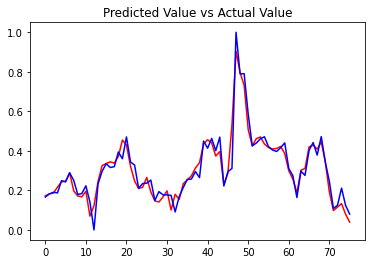

In [8]:
### Model Creation trial 1.0
### in this model the dropouts are added to prvent over fitting
model = keras.Sequential()

model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(32, 6)))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error",  metrics=["accuracy"])

model.fit(batch_train, label_train, batch_size=1078, epochs=250, verbose=0)

test_loss, test_acc = model.evaluate(batch_test, label_test, batch_size=76)

predictions = model.predict(batch_test, batch_size=76)

print(f"test loss: {test_loss}")
print(f"test accuracy: {test_acc}")

showModelData()

1/1 [==============================] - 1s 951ms/step - loss: 0.0020 - accuracy: 0.0263
test loss: 0.0019541203510016203
test accuracy: 0.02631578966975212


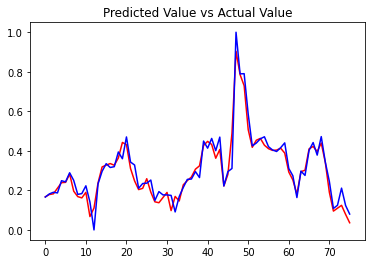

In [9]:
### Model Creation trial 1.0
### in this model the dropouts are added to prvent over fitting
### NOTE: I had tried to use the Binary Crossentropy as a loss function but it was messing with the labels when I graphed 
### NOTE: The loss function did very little and doesn't matter too much
model = keras.Sequential()

model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(32, 6)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error",  metrics=["accuracy"])

model.fit(batch_train, label_train, batch_size=1078, epochs=250, verbose=0)

test_loss, test_acc = model.evaluate(batch_test, label_test, batch_size=76)

predictions = model.predict(batch_test, batch_size=76)

print(f"test loss: {test_loss}")
print(f"test accuracy: {test_acc}")

showModelData()


1/1 [==============================] - 0s 487ms/step - loss: 0.0040 - accuracy: 0.0263
test loss: 0.003968191798776388
test accuracy: 0.02631578966975212


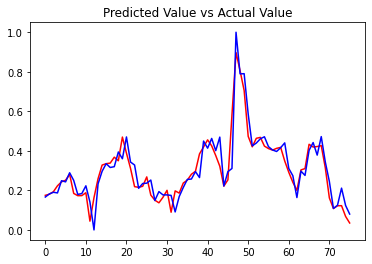

In [10]:
### model trial number 2.0
model = keras.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True, input_shape=(32, 6)))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

model.fit(batch_train, label_train, batch_size=1078, epochs=250, verbose=0)

test_loss, test_acc = model.evaluate(batch_test, label_test, batch_size=76)
predictions = model.predict(batch_test, batch_size=76)
print(f"test loss: {test_loss}")
print(f"test accuracy: {test_acc}")

showModelData()


1/1 [==============================] - 1s 533ms/step - loss: 0.5618 - accuracy: 0.0263
test loss: 0.561771035194397
test accuracy: 0.02631578966975212


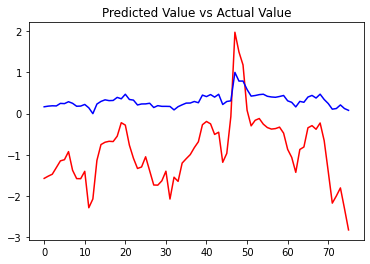

In [11]:
### model trial number 2.1
### NOTE: I had tried to use the Binary Crossentropy as a loss function but it was messing with the labels when I graphed 
### NOTE: The loss function did very little and doesn't matter too much
model = keras.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True, input_shape=(32, 6)))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))

model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(from_logits=True),  metrics=["accuracy"])
### note test this with mean_squared as well
model.fit(batch_train, label_train, batch_size=1078, epochs=250, verbose=0)

test_loss, test_acc = model.evaluate(batch_test, label_test, batch_size=76)
predictions = model.predict(batch_test, batch_size=76)
print(f"test loss: {test_loss}")
print(f"test accuracy: {test_acc}")

showModelData()